# Hotel Booking

Read the File

In [1]:
import pandas as pd
from sklearn.impute import KNNImputer

In [2]:
# URL of the CSV file on GitHub
url = 'https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/MBAN%206750%20HW/hotel_bookings.csv'

# Read the CSV file from the URL
hotel_bookings = pd.read_csv(url)

Preliminary EDA

In [3]:
hotel_bookings.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel_bookings.shape

(119390, 32)

In [6]:
hotel_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Data Cleaning

In [8]:
# Check for null (missing) values in the entire DataFrame
null_values = hotel_bookings.isnull().sum()

# Display columns with null values and the count of null values in each
null_values[null_values > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [9]:
# impute missing values in the children column with 0 and 
# use KNNImputer for missing values in the country column 
# based on 'customer_type', 'adults', 'lead_time', 'required_car_parking_spaces', and 'total_of_special_requests'
# assuming customers who booked similar type of rooms, with similar amount of guests, similar 'lead time', 
# similar needs for parking and special requests, are from the same country

# Impute missing values in the 'children' column with 0
hotel_bookings['children'].fillna(0, inplace=True)

# Select the columns to be used for KNN imputation
knn_columns = ['customer_type', 'adults', 'lead_time', 'required_car_parking_spaces', 'total_of_special_requests', 'country']

# Create a separate DataFrame for KNN imputation
knn_data = hotel_bookings[knn_columns]

# Convert categorical columns to numerical using one-hot encoding
knn_data_encoded = pd.get_dummies(knn_data, columns=['customer_type', 'country'], dummy_na=True)

# Initialize KNNImputer with an appropriate number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
knn_imputed = knn_imputer.fit_transform(knn_data_encoded)

# Convert the imputed array back to a DataFrame
knn_imputed_df = pd.DataFrame(knn_imputed, columns=knn_data_encoded.columns)

# Extract the imputed 'country' column, which was one-hot encoded
imputed_country_columns = [col for col in knn_imputed_df.columns if 'country_' in col]

# Find the column with the maximum value to decode the one-hot encoding
imputed_country = knn_imputed_df[imputed_country_columns].idxmax(axis=1)
imputed_country = imputed_country.str.replace('country_', '')

# Assign the imputed 'country' values back to the original DataFrame
hotel_bookings['country'] = imputed_country

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_2363/3920868361.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_bookings['children'].fillna(0, inplace=True)


In [10]:
# for missing value in 'agent' and 'company', we leave them as NaN, since they are NaN as the natrue of the columns

In [11]:
# If a number in column 'adult'=0, make it '1', assuming children and babies cannot book a hotel room without an adult.

# Update 'adults' column: if any value is 0, replace it with 1
hotel_bookings.loc[hotel_bookings['adults'] == 0, 'adults'] = 1

# Display the first few rows to confirm the changes
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
# in the adr column, if the adr<0, use KNN imputer to impute a new adr, 
# based on columns including: 'reserved_room_type','meal', 'market_segment', 'distribution_channel', 'deposit_type', 'agent', 'company','required_car_parking_spaces', 'total_of_special_requests'
# assume any 'adr' < 0 is not reasonble

# Replace negative values in 'adr' column with NaN for imputation
hotel_bookings.loc[hotel_bookings['adr'] < 0, 'adr'] = None

# Select the columns to be used for KNN imputation
knn_columns = ['adr', 'reserved_room_type', 'meal', 'market_segment', 'distribution_channel']

# Create a separate DataFrame for KNN imputation
knn_data = hotel_bookings[knn_columns]

# Convert categorical columns to numerical using one-hot encoding
knn_data_encoded = pd.get_dummies(knn_data, columns=['reserved_room_type', 'meal', 'market_segment', 'distribution_channel'], dummy_na=True)

# Initialize KNNImputer with an appropriate number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
knn_imputed = knn_imputer.fit_transform(knn_data_encoded)

# Convert the imputed array back to a DataFrame
knn_imputed_df = pd.DataFrame(knn_imputed, columns=knn_data_encoded.columns)

# Assign the imputed 'adr' values back to the original DataFrame
hotel_bookings['adr'] = knn_imputed_df['adr']


In [13]:
# Change the extrme outlier in 'adr'
# To impute the values in the adr column that are above the 99.9th percentile using KNN imputer
# based on the specified columns including 'reserved_room_type', 'meal', 'market_segment', 'distribution_channel'

# Calculate the 99.9th percentile of the 'adr' column
threshold = hotel_bookings['adr'].quantile(0.999)

# Replace 'adr' values above the 99.9th percentile with NaN for imputation
hotel_bookings.loc[hotel_bookings['adr'] > threshold, 'adr'] = None

# Select the columns to be used for KNN imputation
knn_columns = ['adr', 'reserved_room_type', 'meal', 'market_segment', 'distribution_channel']

# Create a separate DataFrame for KNN imputation
knn_data = hotel_bookings[knn_columns]

# Convert categorical columns to numerical using one-hot encoding
knn_data_encoded = pd.get_dummies(knn_data, columns=['reserved_room_type', 'meal', 'market_segment', 'distribution_channel'], dummy_na=True)

# Initialize KNNImputer with an appropriate number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
knn_imputed = knn_imputer.fit_transform(knn_data_encoded)

# Convert the imputed array back to a DataFrame
knn_imputed_df = pd.DataFrame(knn_imputed, columns=knn_data_encoded.columns)

# Assign the imputed 'adr' values back to the original DataFrame
hotel_bookings['adr'] = knn_imputed_df['adr']

# Display the first few rows to confirm the changes
print(hotel_bookings[['adr', 'reserved_room_type', 'meal', 'market_segment', 'distribution_channel']].head())


    adr reserved_room_type meal market_segment distribution_channel
0   0.0                  C   BB         Direct               Direct
1   0.0                  C   BB         Direct               Direct
2  75.0                  A   BB         Direct               Direct
3  75.0                  A   BB      Corporate            Corporate
4  98.0                  A   BB      Online TA                TA/TO


Feature Engineering

In [14]:
# merge the arrival_date_year, arrival_date_month
# and arrival_date_day_of_month columns into a single column called arrival_date:

# Convert month names to month numbers
hotel_bookings['arrival_date_month'] = pd.to_datetime(hotel_bookings['arrival_date_month'], format='%B').dt.month

# Create the arrival_date column
hotel_bookings['arrival_date'] = pd.to_datetime(hotel_bookings['arrival_date_year'].astype(str) + '-' + 
                                                 hotel_bookings['arrival_date_month'].astype(str) + '-' + 
                                                 hotel_bookings['arrival_date_day_of_month'].astype(str))

# Display the first few rows to confirm the changes
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [15]:
# To add a new column called room_type_change in the hotel_bookings DataFrame,
# if reserved_room_type equals to assigned_room_type, mark it with 0, otherwide, mark it as 1

# Add a new column 'room_type_change'
hotel_bookings['room_type_change'] = hotel_bookings.apply(
    lambda row: 0 if row['reserved_room_type'] == row['assigned_room_type'] else 1, axis=1
)

# Display the first few rows to confirm the changes
print(hotel_bookings[['reserved_room_type', 'assigned_room_type', 'room_type_change']].head())

  reserved_room_type assigned_room_type  room_type_change
0                  C                  C                 0
1                  C                  C                 0
2                  A                  C                 1
3                  A                  A                 0
4                  A                  A                 0


In [16]:
# To calculate the total_stay_nights by adding stays_in_weekend_nights and stays_in_week_nights 
# in the hotel_bookings DataFrame

# Calculate the total_stay_nights
hotel_bookings['total_stay_nights'] = hotel_bookings['stays_in_weekend_nights'] + hotel_bookings['stays_in_week_nights']

# Display the first few rows to confirm the changes
print(hotel_bookings[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay_nights']].head())


   stays_in_weekend_nights  stays_in_week_nights  total_stay_nights
0                        0                     0                  0
1                        0                     0                  0
2                        0                     1                  1
3                        0                     1                  1
4                        0                     2                  2


In [17]:
# Due to their distinct market position, we seperate the dataset into 'City Hotel' and 'Resort Hotel', 
# and study them seperately
# Split the DataFrame into city_hotel and resort_hotel based on the 'hotel' column
city_hotel = hotel_bookings[hotel_bookings['hotel'] == 'City Hotel']
resort_hotel = hotel_bookings[hotel_bookings['hotel'] == 'Resort Hotel']

city_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,room_type_change,total_stay_nights
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,...,79330.000000,71199.000000,3689.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,6.556473,27.177449,15.786625,0.795185,2.182957,1.855893,0.091365,...,0.187369,28.144721,145.271618,3.226774,105.200041,0.024367,0.546918,2016-09-04 06:42:49.781924096,0.090659,2.978142
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,2015-07-01 00:00:00,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,4.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,9.000000,40.000000,0.000000,79.200000,0.000000,0.000000,2016-03-25 00:00:00,0.000000,2.000000
50%,0.000000,74.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,9.000000,91.000000,0.000000,99.900000,0.000000,0.000000,2016-09-14 00:00:00,0.000000,3.000000
75%,1.000000,163.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,17.000000,219.000000,0.000000,126.000000,0.000000,1.000000,2017-03-24 00:00:00,0.000000,4.000000
max,1.000000,629.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,...,21.000000,509.000000,497.000000,391.000000,324.500000,3.000000,5.000000,2017-08-31 00:00:00,1.000000,57.000000
std,0.493111,110.948526,0.699181,3.042898,13.398523,8.728451,0.885026,1.456416,0.496055,0.372168,...,0.608620,56.432181,119.774134,20.870890,39.183563,0.154919,0.780776,NaN,0.287126,1.862937


In [18]:
resort_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,room_type_change,total_stay_nights
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,...,40060.000000,31851.000000,3108.000000,40060.000000,40060.000000,40060.000000,40060.00000,40060,40060.000000,40060.000000
mean,0.277634,92.675686,2016.121443,6.544583,27.140864,15.821243,1.189815,3.128732,1.867474,0.128682,...,0.287968,217.571725,241.486165,0.527758,94.582420,0.138068,0.61977,2016-08-15 15:40:38.222665984,0.192836,4.318547
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.00000,2015-07-01 00:00:00,0.000000,0.000000
25%,0.000000,10.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,240.000000,154.000000,0.000000,50.000000,0.000000,0.00000,2016-02-14 00:00:00,0.000000,2.000000
50%,0.000000,57.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,...,0.000000,240.000000,223.000000,0.000000,75.000000,0.000000,0.00000,2016-08-19 00:00:00,0.000000,3.000000
75%,1.000000,155.000000,2017.000000,9.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,...,0.000000,242.000000,330.000000,0.000000,125.000000,0.000000,1.00000,2017-03-05 00:00:00,0.000000,7.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,17.000000,535.000000,543.000000,185.000000,326.000000,8.000000,5.00000,2017-08-31 00:00:00,1.000000,69.000000
std,0.447837,97.285315,0.722347,3.183032,14.005441,8.883708,1.147812,2.461329,0.696649,0.445195,...,0.726548,88.264489,125.930668,7.428580,60.368813,0.351001,0.81393,NaN,0.394530,3.380273


In [19]:
# Check the data imbalance

# Calculate data imbalance in the 'is_canceled' column for city_hotel in %
city_hotel_imbalance = city_hotel['is_canceled'].value_counts(normalize=True) * 100

# Calculate data imbalance in the 'is_canceled' column for resort_hotel in %
resort_hotel_imbalance = resort_hotel['is_canceled'].value_counts(normalize=True) * 100

# Display the imbalance for both city_hotel and resort_hotel
print("City Hotel 'is_canceled' Data Imbalance:")
print(city_hotel_imbalance)

print("\nResort Hotel 'is_canceled' Data Imbalance:")
print(resort_hotel_imbalance)

City Hotel 'is_canceled' Data Imbalance:
is_canceled
0    58.273037
1    41.726963
Name: proportion, dtype: float64

Resort Hotel 'is_canceled' Data Imbalance:
is_canceled
0    72.236645
1    27.763355
Name: proportion, dtype: float64


In [20]:
# For city_hotel, count the total number of adults each month (differentiate the years) 
# and calculate the median of adults counted for each month. 
# If a month's adults count > the median of that year, label all the bookings as 'busy month-individual'; 
# otherwise, label it 'slack month-individual' 
# (Assuming that for city hotels, adults guest are subject we want to study)

# Count the total number of adults each month for city_hotel
city_hotel['month_year'] = city_hotel['arrival_date'].dt.to_period('M')
monthly_adults_count = city_hotel.groupby(['month_year', 'arrival_date_year', 'arrival_date_month'])['adults'].sum().reset_index()

# Calculate the median of adults counted for each month of that year
median_monthly_adults = monthly_adults_count.groupby('arrival_date_year')['adults'].median().reset_index()
median_monthly_adults.columns = ['arrival_date_year', 'median_adults']

# Merge the median values with the original monthly adults count
monthly_adults_count = monthly_adults_count.merge(median_monthly_adults, on='arrival_date_year')

# Label each month as 'busy month-individual' or 'slack month-individual'
monthly_adults_count['month_label'] = monthly_adults_count.apply(
    lambda row: 'busy month-individual' if row['adults'] > row['median_adults'] else 'slack month-individual', axis=1
)

# Merge the labels back to the original city_hotel DataFrame
city_hotel = city_hotel.merge(
    monthly_adults_count[['month_year', 'month_label']], on='month_year', how='left'
)

# Display the first few rows to confirm the changes
print(city_hotel[['arrival_date', 'adults', 'month_label']].head())

  arrival_date  adults             month_label
0   2015-07-01       1  slack month-individual
1   2015-07-01       2  slack month-individual
2   2015-07-01       1  slack month-individual
3   2015-07-01       2  slack month-individual
4   2015-07-02       2  slack month-individual


/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_2363/3932314324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel['month_year'] = city_hotel['arrival_date'].dt.to_period('M')


In [21]:
city_hotel.head

<bound method NDFrame.head of             hotel  is_canceled  lead_time  arrival_date_year  \
0      City Hotel            0          6               2015   
1      City Hotel            1         88               2015   
2      City Hotel            1         65               2015   
3      City Hotel            1         92               2015   
4      City Hotel            1        100               2015   
...           ...          ...        ...                ...   
79325  City Hotel            0         23               2017   
79326  City Hotel            0        102               2017   
79327  City Hotel            0         34               2017   
79328  City Hotel            0        109               2017   
79329  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                       7                        27   
1                       7                        27   
2                       7           

In [22]:
 # For resort_hotel, calculate the total number of adults, children, and babies for each month at the resort hotel, 
 # and differentiate the counts by year. 
 # Then, find the median of the total count of adults, children, and babies for each month. 
 # If the count of adults in a month is greater than the median for that year, 
 # label all the bookings for that month as 'busy month-family'; otherwise, label it as 'slack month-family'.

# Calculate the total number of adults, children, and babies for each month at resort_hotel
resort_hotel['month_year'] = resort_hotel['arrival_date'].dt.to_period('M')
monthly_family_count = resort_hotel.groupby(['month_year', 'arrival_date_year', 'arrival_date_month'])[['adults', 'children', 'babies']].sum().reset_index()

# Calculate the total number of people (adults, children, and babies) for each month
monthly_family_count['total_people'] = monthly_family_count['adults'] + monthly_family_count['children'] + monthly_family_count['babies']

# Calculate the median of the total count of people for each year
median_monthly_family = monthly_family_count.groupby('arrival_date_year')['total_people'].median().reset_index()
median_monthly_family.columns = ['arrival_date_year', 'median_people']

# Merge the median values with the original monthly family count
monthly_family_count = monthly_family_count.merge(median_monthly_family, on='arrival_date_year')

# Label each month as 'busy month-family' or 'slack month-family'
monthly_family_count['month_label'] = monthly_family_count.apply(
    lambda row: 'busy month-family' if row['total_people'] > row['median_people'] else 'slack month-family', axis=1
)

# Merge the labels back to the original resort_hotel DataFrame
resort_hotel = resort_hotel.merge(
    monthly_family_count[['month_year', 'month_label']], on='month_year', how='left'
)

# Display the first few rows to confirm the changes
print(resort_hotel[['arrival_date', 'adults', 'children', 'babies', 'month_label']].head())


  arrival_date  adults  children  babies         month_label
0   2015-07-01       2       0.0       0  slack month-family
1   2015-07-01       2       0.0       0  slack month-family
2   2015-07-01       1       0.0       0  slack month-family
3   2015-07-01       1       0.0       0  slack month-family
4   2015-07-01       2       0.0       0  slack month-family


/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_2363/3178788926.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel['month_year'] = resort_hotel['arrival_date'].dt.to_period('M')


Modeling - CITY HOTEL

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from datetime import datetime

# Define y_city and x_city
y_city = city_hotel['is_canceled']
x_city = city_hotel[['lead_time', 'stays_in_week_nights', 'adults', 'meal', 'market_segment',
                     'distribution_channel', 'previous_cancellations', 'previous_bookings_not_canceled',
                     'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list',
                     'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests',
                     'room_type_change', 'total_stay_nights', 'month_label']]

# Define numerical and categorical columns
numerical_cols = ['lead_time', 'stays_in_week_nights', 'adults', 'previous_cancellations', 
                  'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',  
                  'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stay_nights']
categorical_cols = ['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 
                    'deposit_type', 'customer_type', 'room_type_change', 'month_label']

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Prepare train-test split based on arrival date
city_hotel['arrival_date'] = pd.to_datetime(city_hotel['arrival_date'])
train_data = city_hotel[city_hotel['arrival_date'] < datetime(2016, 7, 1)]
test_data = city_hotel[(city_hotel['arrival_date'] >= datetime(2016, 7, 1)) & (city_hotel['arrival_date'] < datetime(2017, 7, 1))]

X_train = train_data[x_city.columns]
y_train = train_data['is_canceled']
X_test = test_data[x_city.columns]
y_test = test_data['is_canceled']

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Cross-validation and evaluation
f1_scorer = make_scorer(f1_score)

for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=f1_scorer)
    print(f"{model_name} - Cross-Validation F1 Score: {cv_scores.mean():.4f}")

Logistic Regression - Cross-Validation F1 Score: 0.6631
KNN - Cross-Validation F1 Score: 0.6163
Naive Bayes - Cross-Validation F1 Score: 0.6488
Decision Tree - Cross-Validation F1 Score: 0.6355
Random Forest - Cross-Validation F1 Score: 0.6714


Logistic Regression - Best Parameters: {'classifier__C': 100, 'classifier__solver': 'liblinear'}
Logistic Regression - Test Accuracy: 0.7831
Logistic Regression - Test Precision: 0.8412
Logistic Regression - Test Recall: 0.6053
Logistic Regression - Test F1 Score: 0.7040
Logistic Regression - Test ROC AUC: 0.8379



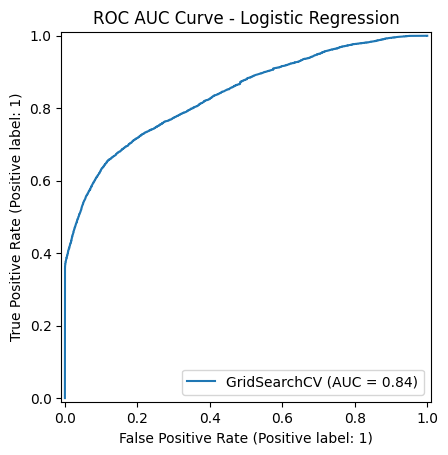

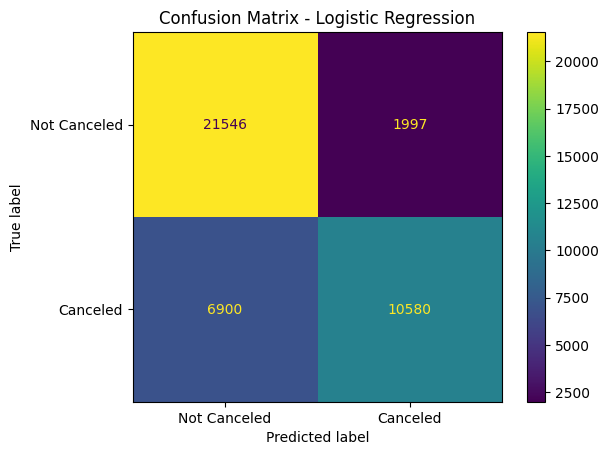

KNN - Best Parameters: {'classifier__n_neighbors': 55, 'classifier__weights': 'uniform'}
KNN - Test Accuracy: 0.7700
KNN - Test Precision: 0.7859
KNN - Test Recall: 0.6326
KNN - Test F1 Score: 0.7010
KNN - Test ROC AUC: 0.8233



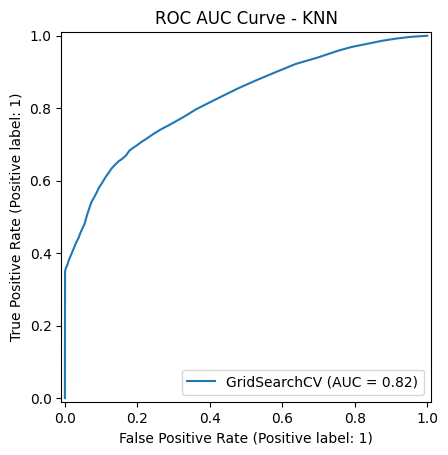

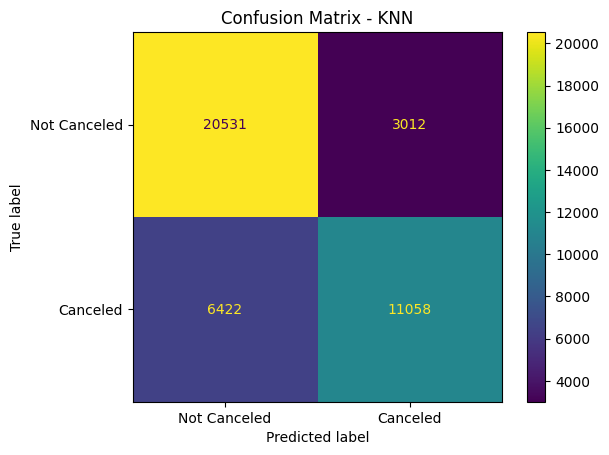

Random Forest - Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Random Forest - Test Accuracy: 0.7710
Random Forest - Test Precision: 0.8849
Random Forest - Test Recall: 0.5317
Random Forest - Test F1 Score: 0.6643
Random Forest - Test ROC AUC: 0.8543



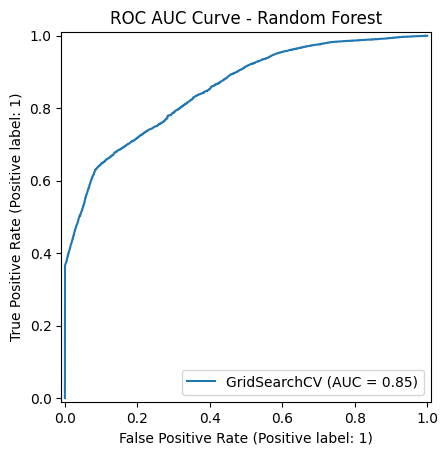

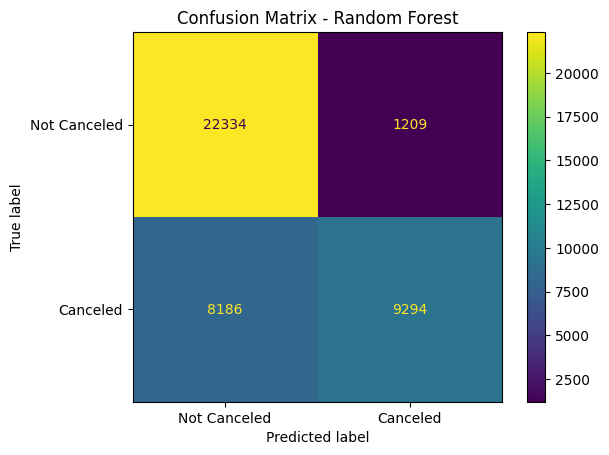

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Parameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 25, 35, 55],
        'classifier__weights': ['uniform', 'distance']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [10, 20, 30, None]
    }
}

best_estimators = {}

for model_name, param_grid in param_grids.items():
    model = models[model_name]
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best estimator
    best_estimators[model_name] = grid_search.best_estimator_
    
    # Print best parameters
    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    
    # Evaluate the best estimator on the test set
    y_pred = grid_search.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
    
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Test Precision: {precision:.4f}")
    print(f"{model_name} - Test Recall: {recall:.4f}")
    print(f"{model_name} - Test F1 Score: {f1:.4f}")
    print(f"{model_name} - Test ROC AUC: {roc_auc:.4f}\n")
    
    # Plot ROC AUC curve
    RocCurveDisplay.from_estimator(grid_search, X_test, y_test)
    plt.title(f'ROC AUC Curve - {model_name}')
    plt.show()
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, display_labels=['Not Canceled', 'Canceled'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

Logistic Regression with 40% Threshold - Test Accuracy: 0.7761
Logistic Regression with 40% Threshold - Test Precision: 0.7664
Logistic Regression with 40% Threshold - Test Recall: 0.6826
Logistic Regression with 40% Threshold - Test F1 Score: 0.7220
Logistic Regression with 40% Threshold - Test ROC AUC: 0.8379



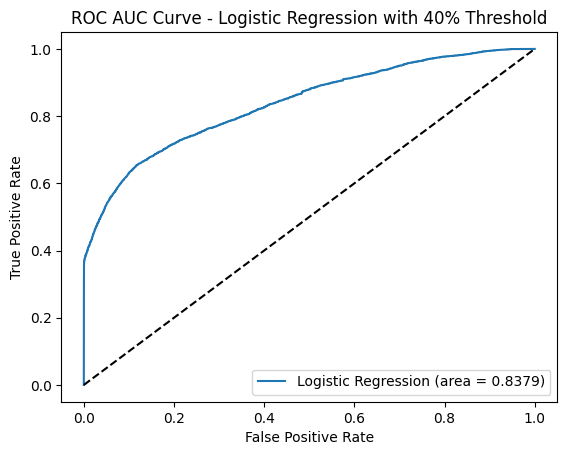

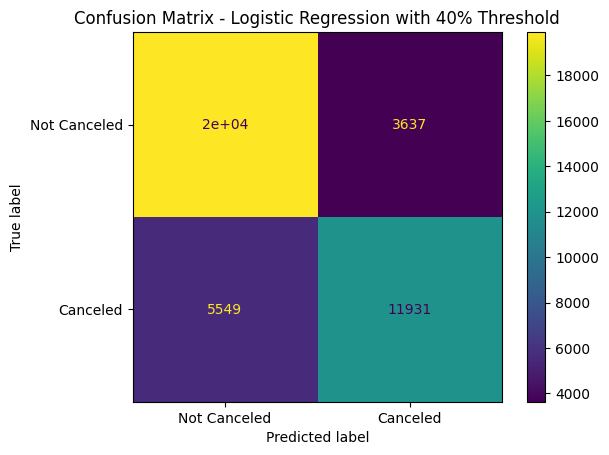

In [25]:
# Consider Precision-Recall trade-off, futher change the threshold for logistic regression to 0.4, instead of 0.5
# Adjust the threshold for Logistic Regression
threshold = 0.4

# Evaluate the best Logistic Regression model with the adjusted threshold
logreg = best_estimators['Logistic Regression']
logreg_probs = logreg.predict_proba(X_test)[:, 1]
logreg_pred = (logreg_probs >= threshold).astype(int)

# Calculate evaluation metrics for Logistic Regression with adjusted threshold
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
logreg_roc_auc = roc_auc_score(y_test, logreg_probs)

print(f"Logistic Regression with 40% Threshold - Test Accuracy: {logreg_accuracy:.4f}")
print(f"Logistic Regression with 40% Threshold - Test Precision: {logreg_precision:.4f}")
print(f"Logistic Regression with 40% Threshold - Test Recall: {logreg_recall:.4f}")
print(f"Logistic Regression with 40% Threshold - Test F1 Score: {logreg_f1:.4f}")
print(f"Logistic Regression with 40% Threshold - Test ROC AUC: {logreg_roc_auc:.4f}\n")

# Plot ROC AUC curve for Logistic Regression with adjusted threshold
fpr, tpr, _ = roc_curve(y_test, logreg_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {logreg_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve - Logistic Regression with 40% Threshold')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix for Logistic Regression with adjusted threshold
ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred, display_labels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Logistic Regression with 40% Threshold')
plt.show()

Modeling - Resort HOTEL

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Define y_resort and x_resort
y_resort = resort_hotel['is_canceled']
x_resort = resort_hotel[['lead_time', 'stays_in_weekend_nights', 'adults', 'meal', 'country', 'market_segment', 
                         'distribution_channel', 'previous_cancellations', 'previous_bookings_not_canceled', 
                         'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 
                         'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 
                         'room_type_change', 'total_stay_nights', 'month_label']]

# Define numerical and categorical features
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'adults', 'previous_cancellations', 
                      'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
                      'required_car_parking_spaces', 'total_of_special_requests', 'total_stay_nights']
categorical_features = ['meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 
                        'deposit_type', 'customer_type', 'room_type_change', 'month_label']

# Create pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Split the train-test data by arrival date
train_data = resort_hotel[(resort_hotel['arrival_date'] >= '2015-07-15') & (resort_hotel['arrival_date'] <= '2016-06-30')]
test_data = resort_hotel[(resort_hotel['arrival_date'] >= '2016-07-01') & (resort_hotel['arrival_date'] <= '2017-06-30')]

x_train = train_data[x_resort.columns]
y_train = train_data['is_canceled']
x_test = test_data[x_resort.columns]
y_test = test_data['is_canceled']

# Define models for cross-validation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Define F1 score as the metric
f1 = make_scorer(f1_score)

# Perform cross-validation and print results
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring=f1)
    print(f"{model_name} F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Logistic Regression F1 Score: 0.6960 (+/- 0.1065)
KNN F1 Score: 0.6111 (+/- 0.0623)
Naive Bayes F1 Score: 0.4536 (+/- 0.0170)
Decision Tree F1 Score: 0.5428 (+/- 0.0933)
Random Forest F1 Score: 0.6003 (+/- 0.1198)


Best parameters for KNN: {'classifier__n_neighbors': 11}
Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

KNN Test Evaluation:
Accuracy: 0.7855
Precision: 0.6827
Recall: 0.4493
F1 Score: 0.5420
ROC AUC: 0.7740

Logistic Regression Test Evaluation:
Accuracy: 0.8008
Precision: 0.7491
Recall: 0.4430
F1 Score: 0.5568
ROC AUC: 0.8288

Random Forest Test Evaluation:
Accuracy: 0.8058
Precision: 0.8319
Recall: 0.3917
F1 Score: 0.5326
ROC AUC: 0.8536


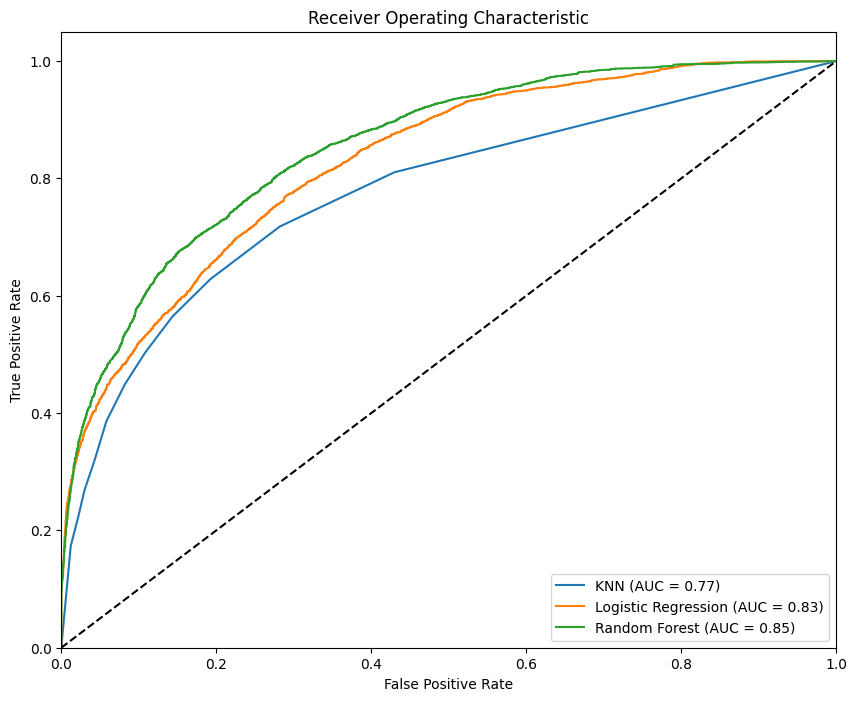

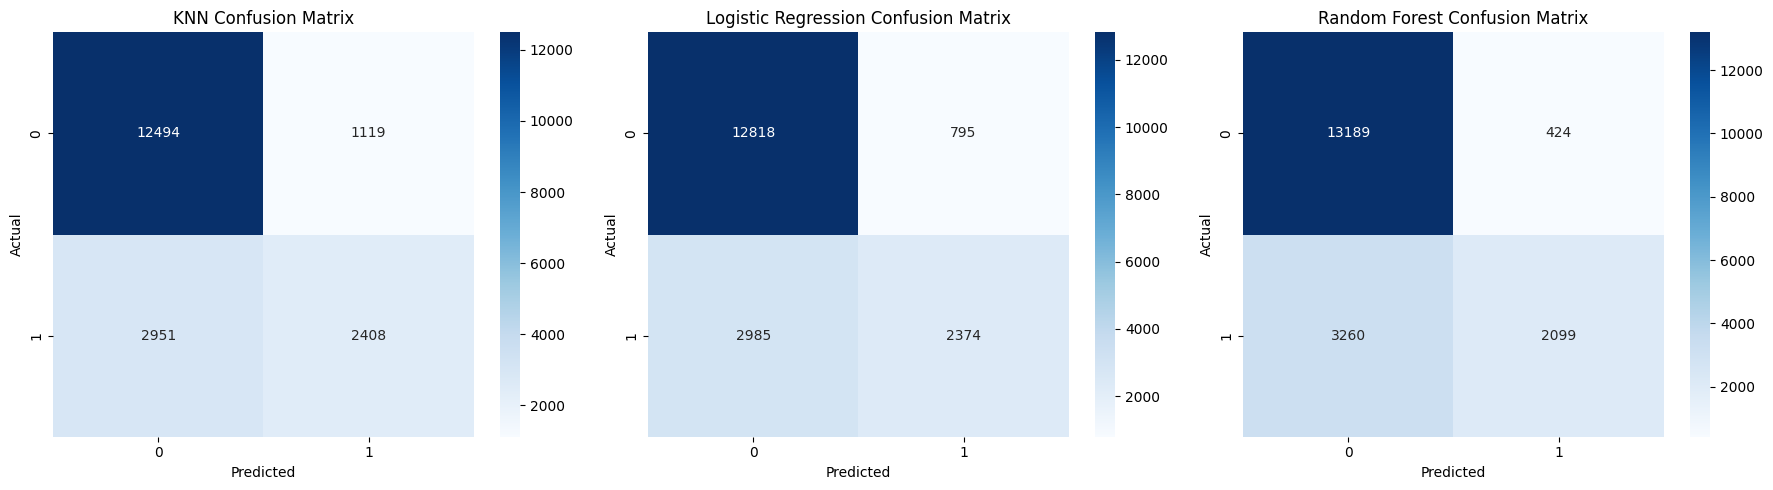

In [27]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grids for the models
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 25, 35, 55]
}

param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# GridSearchCV for each model
grids = {
    'KNN': GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())]),
                        param_grid_knn, scoring='f1', cv=5, n_jobs=-1),
    'Logistic Regression': GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))]),
                                        param_grid_logreg, scoring='f1', cv=5, n_jobs=-1),
    'Random Forest': GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())]),
                                  param_grid_rf, scoring='f1', cv=5, n_jobs=-1)
}

# Fit the models and print the best parameters
for model_name, grid in grids.items():
    grid.fit(x_train, y_train)
    print(f"Best parameters for {model_name}: {grid.best_params_}")

# Evaluate the best models on the test set
evaluation_results = {}
for model_name, grid in grids.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    cm = confusion_matrix(y_test, y_pred)
    
    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr
    }

    print(f"\n{model_name} Test Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, results in evaluation_results.items():
    plt.plot(results['fpr'], results['tpr'], label=f'{model_name} (AUC = {results["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (model_name, results) in zip(axes, evaluation_results.items()):
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()
